# 파이썬 자연어처리 초급 미션: 맛집 리뷰 분석 챌린지

## 배경 스토리
당신은 인기 맛집 리뷰 분석가입니다.
네이버 블로그나 소셜 미디어에 올라온 한식 맛집 리뷰를 모아서, 자주 쓰이는 키워드를 추출하고 시각화하여 다음 방문자를 위한 가이드를 만들려고 합니다.



아래 2개 데이터셋을 사용합니다: 

dataset for model learning/kakaomap_data/review_labeled.xslx 

dataset used for website/navermap_restaurant_reviews_data.xslsx 사용해서 분석 진행.

참조: https://github.com/DataScience-Lab-Yonsei/24-1_DSL_Modeling_NLP2_Restaurant_Review_Sentiment_Analysis?utm_source=chatgpt.com

" GitHub
DataScience-Lab-Yonsei/24 ... - GitHub
음식점 긍부정 리뷰 요약 및 카테고리 세분화; 카카오 리뷰 데이터를 활용하여 fine tuning한 KoELECTRA 모델로 네이버 음식점 리뷰의 긍부정을 분석하였습니다... "

## 과제 요구사항

1. **데이터 불러오기 & 전처리**
   - `pandas`로 데이터셋 로드
   - 결측치 제거, 이모지·특수문자 제거

2. **형태소 분석**
   - `konlpy`의 `Okt` 또는 `Mecab` 사용
   - 명사 추출 및 사용자 지정 불용어 제거

3. **단어 빈도 분석**
   - 전체 리뷰 명사의 빈도 계산
   - 상위 20개 단어 출력

4. **워드 클라우드 시각화**
   - `wordcloud` 라이브러리 사용
   - 한글 폰트 지정
   - 워드 클라우드 이미지 저장 및 출력

5. **(보너스) 맛집별 키워드 비교**
   - 식당별 상위 10개 단어 추출
   - `matplotlib`로 빈도 막대그래프 그리기

## 제출물

- Jupyter Notebook (`NLP_Mission_GitHub_Dataset.ipynb`)
- 코드 실행 결과 캡처
- `wordcloud.png` 파일

In [58]:
!pip install openpyxl

In [59]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 1. 데이터 로드
df = pd.read_excel('navermap_restaurant_reviews_data.xlsx')
df2 = pd.read_excel('review_labeled.xlsx')
df


,가게,작성자,리뷰
0,쭈꾸미블루스,밍유토리,NaN
1,쭈꾸미블루스,칠월일일,쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요😋 적당히 매콤해서 맵찔이도 맛있게 ...
2,쭈꾸미블루스,eun4062,NaN
3,쭈꾸미블루스,검프16,"쭈꾸미 삼겹살 신촌맛집. 레트로한 분위기와 잘 어울리는 홍합탕, 콘치즈, 계란찜 등..."
4,쭈꾸미블루스,밥곤듀,아주 추천하는 곳입니다~ 쭈꾸미 맛있어요! 쭈꾸미 통통하고 크고. 소스가 적당히 딱...
...,...,...,...
775,정통집 신촌점,sweetie99,후추 맛이 조금 강해요
776,정통집 신촌점,qwerty8883,가성비 그저그런듯
777,정통집 신촌점,달썬,저녁시간에 30분기다려서 먹었는데 특별한 맛은 아니었어요 고기는 맛있었는데 김치가 ...
778,정통집 신촌점,유니니니닝,ㅎ


In [60]:
df.dropna(inplace=True)
df
df2.dropna(inplace=True)
df2

,Unnamed: 0,Sentence,Label
0,0,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,1
1,1,맛있어요,1
2,2,여자친구가 너무 좋아함 맛있게 먹었음,1
3,3,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,1
4,4,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,0
...,...,...,...
2296,572,아 뭐 워낙 유명하다니 기준을 높게잡은거고 충분히 맛있긴 합니다,1
2297,573,분위기는 좋음,1
2298,574,갓 나온 음식이 차갑고 맛은 그냥저냥,0
2299,575,신촌에 기본도 못하는 부대찌개집이 많아 상대적으로 맛나게 느껴지지만 부대전골은 맛과...,1


In [61]:
# 특수문자 및 이모지 제거 함수
def preprocess(text):
    text = re.sub(r'[^\uAC00-\uD7A3\s]', '', text)  # 한글, 공백 제외 제거
    return text.strip()

df['clean'] = df['리뷰'].apply(preprocess)

df['clean'].head(10)

1     쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹...
3     쭈꾸미 삼겹살 신촌맛집 레트로한 분위기와 잘 어울리는 홍합탕 콘치즈 계란찜 등 깻잎...
4     아주 추천하는 곳입니다 쭈꾸미 맛있어요 쭈꾸미 통통하고 크고 소스가 적당히 딱 매운...
6                               푸짐하도 싱싱하고 친절한 신촌 쭈꾸미 맛집
11                                               넘흐맛있어요
12    옛날 풍경속에서 맛있는걸 먹을 수 있는 재밌고맛있는 곳이예요 인테리어 만으로도 충분...
14    딱 좋아하는 매운맛이라 식겁하고 먹었습니다 마오네즈에 찍어먹으면 존맛탱 직원분들도 ...
15    쭈꾸미가 엄청 매콤하고 탱글탱글 식감이 너무 맛있습니다 삼겹살이랑 깻잎 김이랑 마요...
16          큼지막한 쭈꾸미 낭낭하게 많이 넣어주셔요 매콤하고 맛나요 마무리는 역시 볶음밥
17                           쭈꾸미 통통하고 맛있어요 계란찜 리필돼서 좋아요
Name: clean, dtype: object

In [62]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()

# 명사 추출
df['nouns_raw'] = df['clean'].apply(lambda x: okt.nouns(x))

# 모든 명사 리스트 합치기
all_nouns = sum(df['nouns_raw'], [])

# 빈도 분석
counter = Counter(all_nouns)
print(counter.most_common(100))  # 상위 30개 단어 출력


[('쭈꾸미', 110), ('맛', 81), ('볶음밥', 78), ('맛집', 43), ('굿', 43), ('신촌', 34), ('진짜', 30), ('정말', 28), ('치즈', 25), ('또', 25), ('쭈삼', 25), ('존맛', 24), ('날치', 24), ('곳', 23), ('알', 23), ('방문', 22), ('사장', 20), ('직원', 20), ('수', 19), ('분위기', 19), ('계란찜', 19), ('양', 19), ('때', 18), ('양도', 17), ('깻잎', 17), ('양념', 17), ('꼭', 16), ('최고', 16), ('고기', 16), ('매콤', 15), ('메뉴', 15), ('음식', 14), ('김치', 14), ('홍합', 13), ('아주', 13), ('인테리어', 13), ('여기', 13), ('집', 13), ('가게', 12), ('좀', 12), ('자주', 12), ('비', 12), ('짱', 12), ('맵', 11), ('요', 11), ('완전', 11), ('주문', 11), ('서비스', 11), ('항상', 11), ('탕', 10), ('추천', 10), ('역시', 10), ('더', 10), ('생각', 10), ('삼겹살', 9), ('밥', 9), ('제일', 9), ('기분', 9), ('가성', 9), ('다음', 9), ('점', 9), ('돼지', 9), ('계란', 8), ('무한리필', 8), ('블루스', 8), ('것', 8), ('안', 8), ('처음', 8), ('술', 8), ('짱짱', 8), ('구이', 8), ('만', 7), ('습', 7), ('하나', 7), ('년', 7), ('분', 7), ('추가', 7), ('친구', 7), ('계속', 7), ('이', 6), ('마요네즈', 6), ('소스', 6), ('조합', 6), ('점심', 6), ('날', 6), ('강추', 6), ('팅', 6), ('식

In [63]:
stopwords = set([
    '굿', '진짜', '정말', '꼭', '최고', '완전', '짱', '짱짱', '역시', '더', '항상', '아주', '자주', '또',
    '수', '때', '점', '것', '만', '안', '이', '요', '비', '분', '습', '날','존맛','양도','방문'
])

In [64]:
# 불용어 제거 + 길이 1 이하 제거
df['nouns'] = df['nouns_raw'].apply(lambda x: [n for n in x if n not in stopwords and len(n) > 1])

# 불용어 제거 후 빈도 재확인
filtered_count = Counter(sum(df['nouns'], []))
print(filtered_count.most_common(20))


[('쭈꾸미', 110), ('볶음밥', 78), ('맛집', 43), ('신촌', 34), ('치즈', 25), ('쭈삼', 25), ('날치', 24), ('사장', 20), ('직원', 20), ('분위기', 19), ('계란찜', 19), ('깻잎', 17), ('양념', 17), ('고기', 16), ('매콤', 15), ('메뉴', 15), ('음식', 14), ('김치', 14), ('홍합', 13), ('인테리어', 13)]


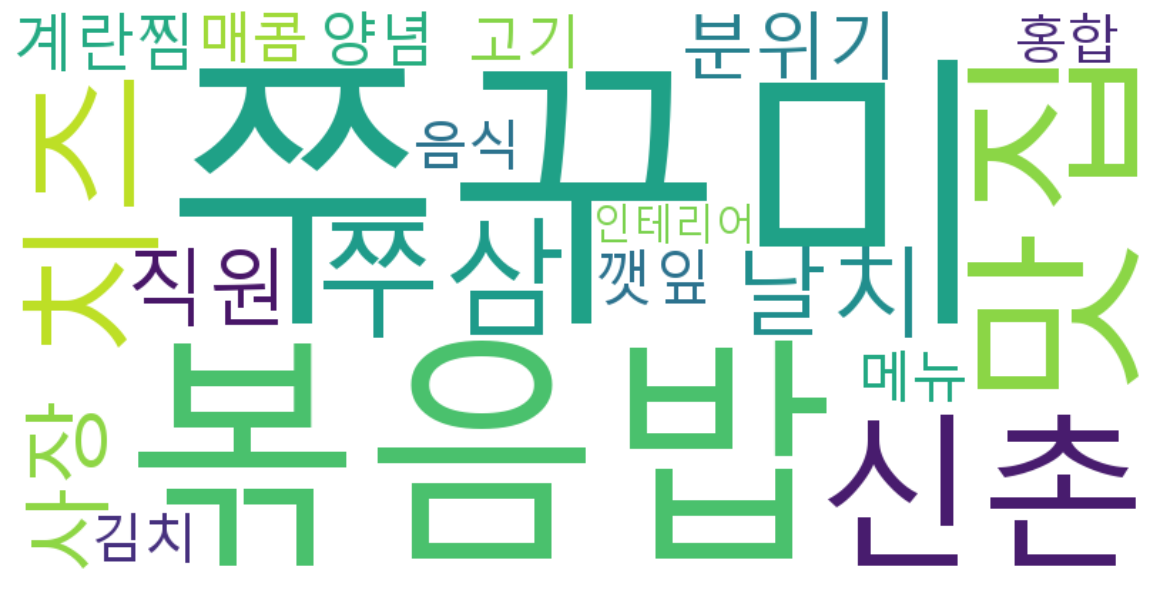

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 상위 20개 단어만 추출
top20 = dict(Counter(sum(df['nouns'], [])).most_common(20))

# 2. 한글 폰트 경로 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕

# 3. 워드 클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(top20)

# 4. 출력 및 저장
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('상위 20개.png')  # 이미지 저장
plt.show()


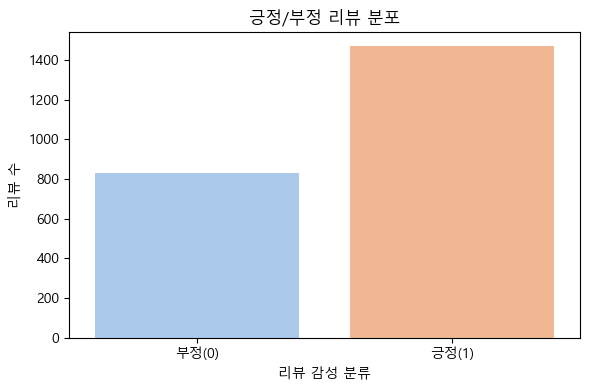

긍정 리뷰 수: 1469
부정 리뷰 수: 832


In [66]:
import seaborn as sns

# 시스템에 설치된 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')  # '맑은 고딕' 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 라벨 분포 집계
label_counts = df2['Label'].value_counts().sort_index()  # 0 → 부정, 1 → 긍정

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette='pastel', legend=False)

plt.xticks([0, 1], ['부정(0)', '긍정(1)'])
plt.xlabel('리뷰 감성 분류')
plt.ylabel('리뷰 수')
plt.title('긍정/부정 리뷰 분포')
plt.tight_layout()
plt.show()

# 긍정 리뷰 데이터 수량
positive_count = df2[df2['Label'] == 1].shape[0]
print(f"긍정 리뷰 수: {positive_count}")
# 부정 리뷰 데이터 수량
negative_count = df2[df2['Label'] == 0].shape[0]
print(f"부정 리뷰 수: {negative_count}")


In [67]:
df2['clean'] = df2['Sentence'].apply(preprocess)
df2['clean'].head(10)

0                             다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요
1                                                 맛있어요
2                                 여자친구가 너무 좋아함 맛있게 먹었음
3                 요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효
4        그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요
5    면발국물양 가격 최고에요 마늘 좋아해서 개인적으로 다진 마늘 잔뜩 넣어서 먹고오면 ...
6                               좀 예전에 갔는데 맛없고 안신선해서 깜놀
7                         담에는 저녁에 방문해서 와인이랑 같이 즐기고 싶어요
8                                       진짜 싸가지 드럽게 없어요
9                     깨부수면은 같이 주는 육수 없으면 퍽퍽해서 입 안이 말라요
Name: clean, dtype: object

In [68]:
# 명사 추출
df2['nouns_raw'] = df2['clean'].apply(lambda x: okt.nouns(x))

# 모든 명사 리스트 합치기
all_nouns = sum(df2['nouns_raw'], [])

# 빈도 분석
counter = Counter(all_nouns)
print(counter.most_common(100))  # 상위 30개 단어 출력


[('맛', 311), ('진짜', 117), ('사장', 116), ('곳', 107), ('가격', 97), ('음식', 87), ('때', 85), ('정말', 83), ('좀', 80), ('것', 79), ('고기', 79), ('직원', 67), ('분위기', 67), ('집', 67), ('여기', 64), ('더', 64), ('신촌', 63), ('밥', 59), ('양', 59), ('방문', 58), ('그냥', 56), ('가성', 55), ('비', 55), ('가게', 55), ('안', 52), ('또', 52), ('별로', 52), ('최고', 49), ('메뉴', 49), ('분', 48), ('생각', 46), ('서비스', 46), ('사람', 45), ('다른', 43), ('수', 43), ('말', 43), ('맛집', 42), ('주문', 42), ('손님', 41), ('느낌', 41), ('기분', 40), ('함', 40), ('점', 40), ('거', 39), ('처음', 38), ('이', 38), ('정도', 38), ('매장', 36), ('다음', 35), ('추천', 35), ('꼭', 34), ('소스', 32), ('테이블', 32), ('다시', 31), ('국물', 31), ('시간', 31), ('존맛', 31), ('하나', 31), ('자리', 30), ('조금', 30), ('제', 29), ('추가', 29), ('번', 29), ('제일', 29), ('튀김', 28), ('저', 28), ('곱창', 27), ('냄새', 26), ('그', 26), ('임', 26), ('가지', 25), ('장사', 25), ('커피', 24), ('먹기', 24), ('치즈', 24), ('탕', 24), ('자주', 23), ('위생', 23), ('식사', 23), ('양도', 23), ('재', 23), ('앞', 23), ('치킨', 23), ('걸', 23), ('파스타', 22), 

In [73]:
stopwords = set([
    '진짜', '정말', '그냥', '또', '최고', '존맛', '완전', '꼭',
    '때', '것', '더', '안', '수', '말', '점', '거', '이', '그',
    '번', '제', '저', '듯', '바', '뭐', '걸', '함', '임', '자주',
    '생각', '다시', '처음', '정도', '시간', '앞', '제일', '보고'
])

df2


,Unnamed: 0,Sentence,Label,clean,nouns_raw,nouns
0,0,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,1,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,"[덴, 조육, 밥, 조기, 밥]","[조육, 조기]"
1,1,맛있어요,1,맛있어요,[],[]
2,2,여자친구가 너무 좋아함 맛있게 먹었음,1,여자친구가 너무 좋아함 맛있게 먹었음,[여자친구],[여자친구]
3,3,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,1,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,"[요즘, 곱창, 대란, 데, 양, 그대로, 넹효]","[요즘, 곱창, 대란, 그대로, 넹효]"
4,4,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,0,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,"[사무실, 계속, 옷, 냄새, 다시, 생각, 안드네]","[사무실, 계속, 냄새, 안드네]"
...,...,...,...,...,...,...
2296,572,아 뭐 워낙 유명하다니 기준을 높게잡은거고 충분히 맛있긴 합니다,1,아 뭐 워낙 유명하다니 기준을 높게잡은거고 충분히 맛있긴 합니다,"[뭐, 워낙, 기준]","[워낙, 기준]"
2297,573,분위기는 좋음,1,분위기는 좋음,[분위기],[분위기]
2298,574,갓 나온 음식이 차갑고 맛은 그냥저냥,0,갓 나온 음식이 차갑고 맛은 그냥저냥,"[갓, 음식, 맛, 저]",[음식]
2299,575,신촌에 기본도 못하는 부대찌개집이 많아 상대적으로 맛나게 느껴지지만 부대전골은 맛과...,1,신촌에 기본도 못하는 부대찌개집이 많아 상대적으로 맛나게 느껴지지만 부대전골은 맛과...,"[신촌, 기본, 부대찌개, 집, 상대, 맛, 부대, 전골, 맛, 가성, 비]","[신촌, 기본, 부대찌개, 상대, 부대, 전골, 가성]"


In [ ]:
# 불용어 제거 및 1글자 제거 포함
df2['nouns'] = df2['nouns_raw'].apply(lambda x: [n for n in x if n not in stopwords and len(n) > 1])

# 긍정 리뷰
pos_df = df2[df2['Label'] == 1].copy()
# 부정 리뷰
neg_df = df2[df2['Label'] == 0].copy()

# 긍정 리뷰에서 빈 리스트 제거
pos_df = pos_df[pos_df['nouns'].apply(lambda x: len(x) > 0)]

# 부정 리뷰에서도 동일하게 적용
neg_df = neg_df[neg_df['nouns'].apply(lambda x: len(x) > 0)]

pos_df['nouns'] 

0                                   [조육, 조기]
2                                     [여자친구]
3                      [요즘, 곱창, 대란, 그대로, 넹효]
5       [면발, 국물, 가격, 마늘, 개인, 마늘, 잔뜩, 보약, 기분]
7                               [저녁, 방문, 와인]
                        ...                 
2288                                    [양도]
2296                                [워낙, 기준]
2297                                   [분위기]
2299          [신촌, 기본, 부대찌개, 상대, 부대, 전골, 가성]
2300                                   [분위기]
Name: nouns, Length: 1270, dtype: object

In [87]:
def draw_wordcloud(noun_lists,filename):
    # 빈 리스트 제외
    noun_lists = [n for n in noun_lists if len(n) > 0]

    # 단어 빈도 계산
    word_count = Counter(sum(noun_lists, []))
    top_words = dict(word_count.most_common(20))  # ✅ 딕셔너리로 변환

    # 워드 클라우드 생성
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(top_words)

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    wc.to_file(filename)


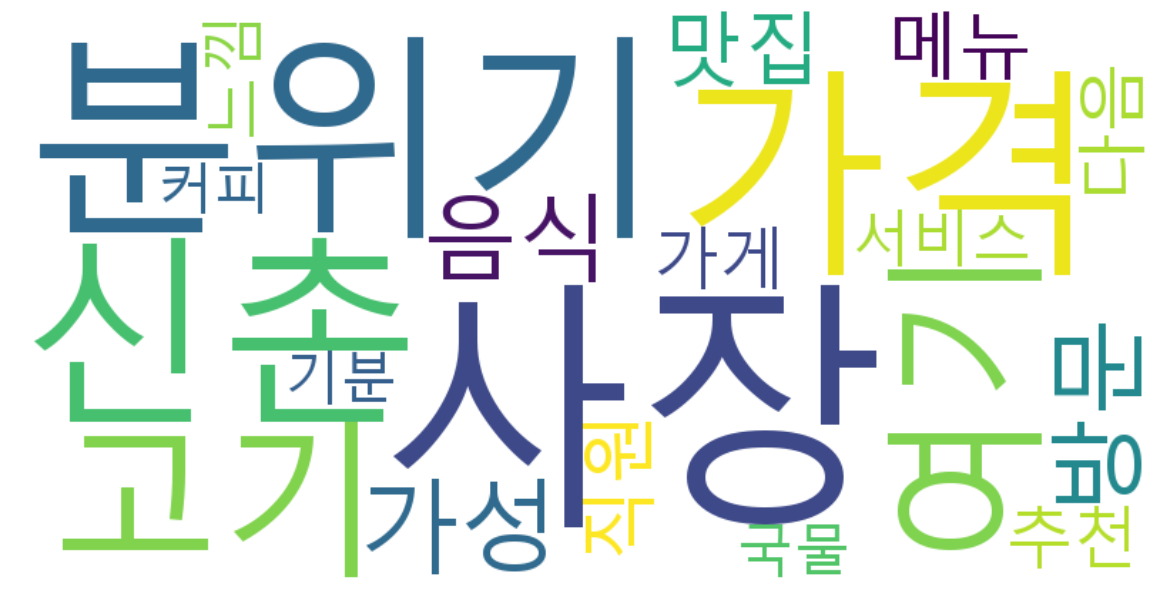

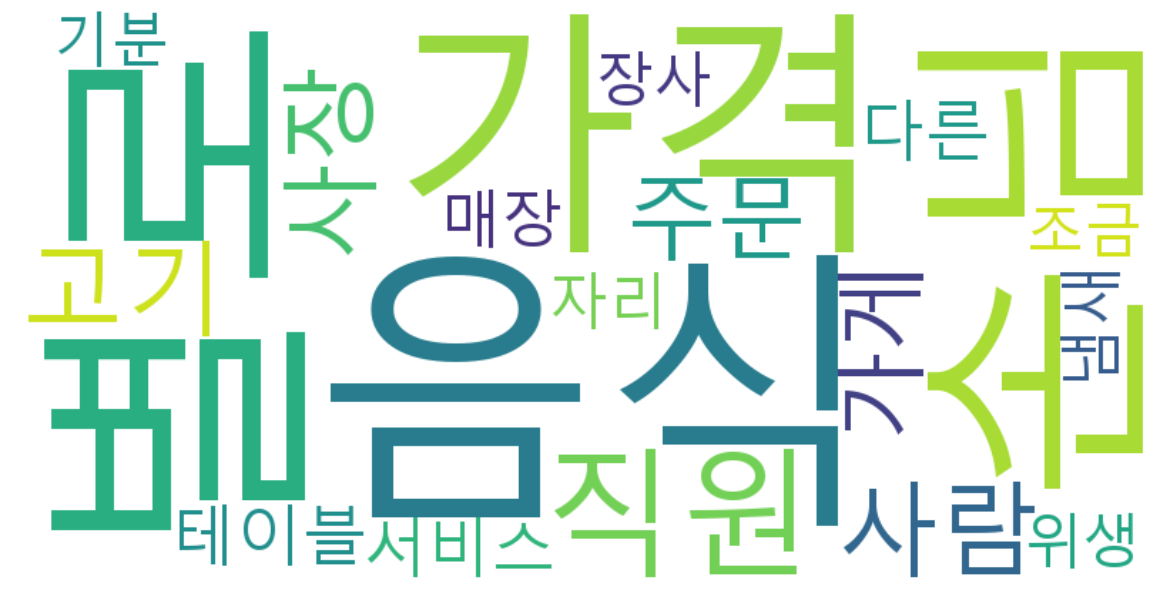

In [88]:
# 긍정 리뷰 워드클라우드
draw_wordcloud(pos_df['nouns'],'positive_wordcloud.png')

# 부정 리뷰 워드클라우드
draw_wordcloud(neg_df['nouns'],'negative_wordcloud.png')